# ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

* Visualize the Time Series Data

* Make the time series data stationary

* Plot the Correlation and AutoCorrelation Charts

* Construct the ARIMA Model

* Use the model to make predictions

# Step 1: Get the Data

In [216]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
df = pd.read_csv('AAPL.csv')

In [218]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/31/2013,79.167145,80.182854,79.142860,80.145714,68.448830,55771100
1,1/2/2014,79.382858,79.575714,78.860001,79.018570,67.486176,58671200
2,1/3/2014,78.980003,79.099998,77.204285,77.282860,66.003777,98116900
3,1/6/2014,76.778572,78.114288,76.228569,77.704285,66.363701,103152700
4,1/7/2014,77.760002,77.994286,76.845711,77.148575,65.889114,79302300


In [219]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1162,8/13/2018,207.699997,210.949997,207.699997,208.869995,208.869995,25869100
1163,8/14/2018,210.160004,210.559998,208.259995,209.750000,209.750000,20748000
1164,8/15/2018,209.220001,210.740005,208.330002,210.240005,210.240005,28807600
1165,8/16/2018,211.750000,213.809998,211.470001,213.320007,213.320007,28500400
1166,8/17/2018,213.440002,217.949997,213.160004,217.580002,217.580002,35427000


Setting the index

In [220]:
df.set_index('Date',inplace=True)

In [221]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
12/31/2013,79.167145,80.182854,79.142860,80.145714,68.448830,55771100
1/2/2014,79.382858,79.575714,78.860001,79.018570,67.486176,58671200
1/3/2014,78.980003,79.099998,77.204285,77.282860,66.003777,98116900
1/6/2014,76.778572,78.114288,76.228569,77.704285,66.363701,103152700
1/7/2014,77.760002,77.994286,76.845711,77.148575,65.889114,79302300


In [222]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1167.0,1.255335e+02,3.207950e+01,7.074000e+01,1.011150e+02,1.165800e+02,1.502350e+02,2.134400e+02
High,1167.0,1.265705e+02,3.228824e+01,7.164714e+01,1.020850e+02,1.174900e+02,1.517850e+02,2.179500e+02
Low,1167.0,1.245175e+02,3.191413e+01,7.050714e+01,1.003500e+02,1.156500e+02,1.490950e+02,2.131600e+02
Close,1167.0,1.255831e+02,3.212373e+01,7.139714e+01,1.010900e+02,1.165000e+02,1.503050e+02,2.175800e+02
Adj Close,1167.0,1.209061e+02,3.406514e+01,6.097706e+01,9.568812e+01,1.116868e+02,1.474871e+02,2.175800e+02
Volume,1167.0,4.323403e+07,2.410362e+07,1.147590e+07,2.635305e+07,3.705120e+07,5.312605e+07,2.663808e+08


# Step 2: Visualize the Data

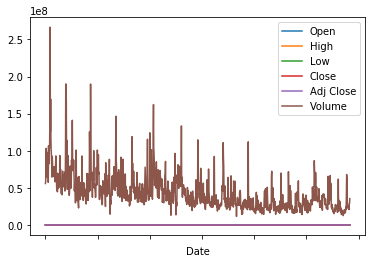

In [223]:
df.plot()

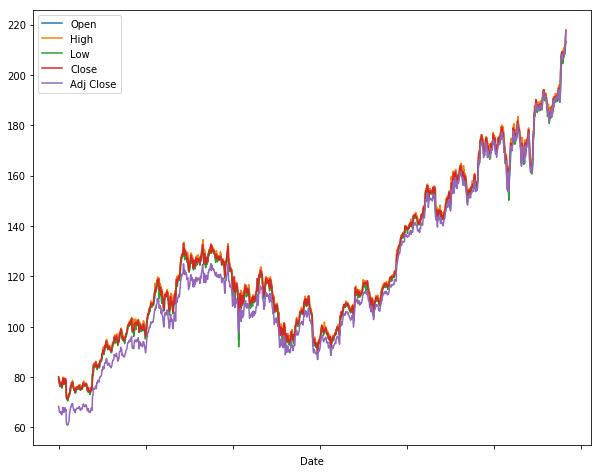

In [224]:
df.drop('Volume',1).plot(figsize=(10,8))

In [225]:
timeseries = df['Close']

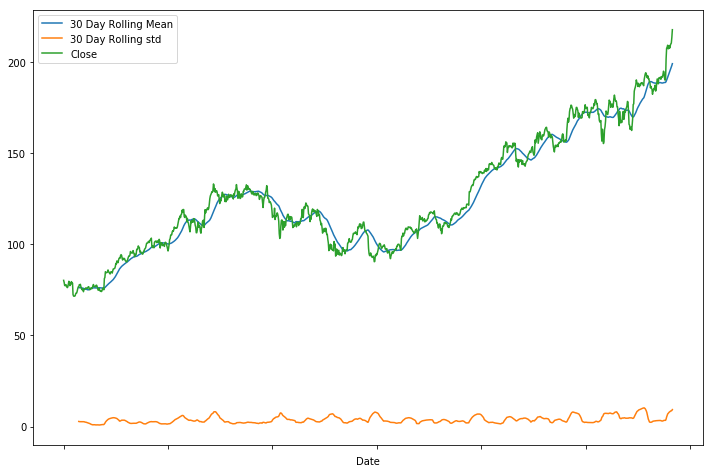

In [382]:
timeseries.rolling(30).mean().plot(label='30 Day Rolling Mean')
timeseries.rolling(30).std().plot(label='30 Day Rolling std')
timeseries.plot(figsize=(12,8))
plt.legend()

# Decomposition

<Figure size 432x288 with 0 Axes>

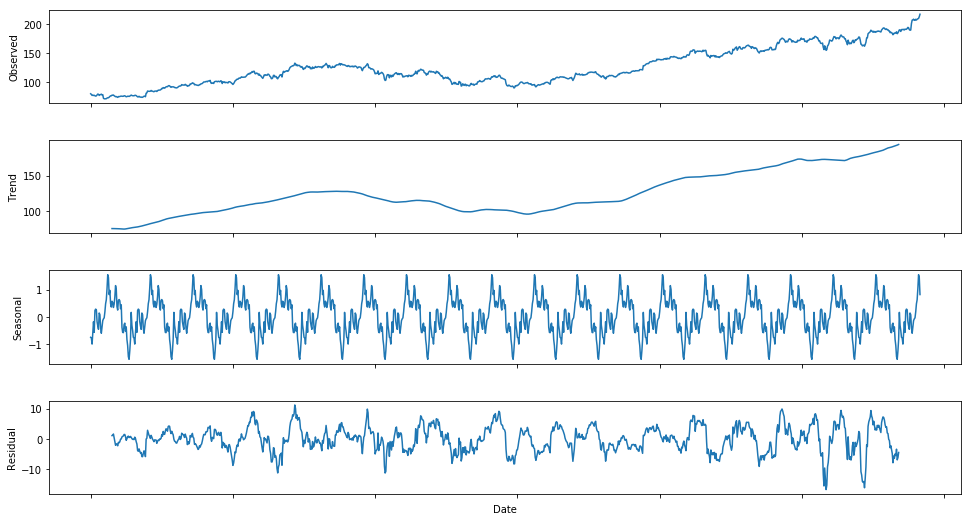

In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], freq=60,model='additive')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

# Testing for Stationarity

We can use the Augmented Dickey-Fuller unit root test
We end up deciding this based on the p-value return

In [228]:
from statsmodels.tsa.stattools import adfuller

In [229]:
result = adfuller(df['Close'])

In [230]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.5081677025282448
p-value : 0.9851192441785451
#Lags Used : 1
Number of Observations Used : 1165
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [231]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# Differencing

First Difference

In [232]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

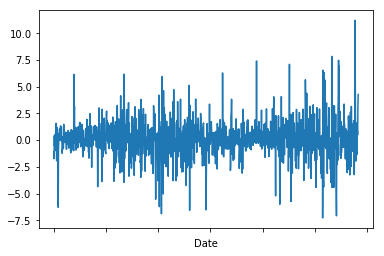

In [233]:
df['Close First Difference'].plot()

In [234]:
adf_check(df['Close First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -32.01429257434287
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1165
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# Autocorrelation plot

In [235]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

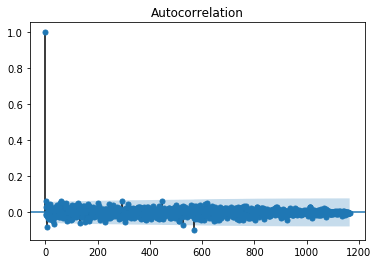

In [236]:
fig_first = plot_acf(df["Close First Difference"].dropna())

# Partial Autocorrelation

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


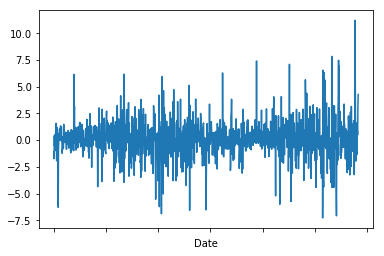

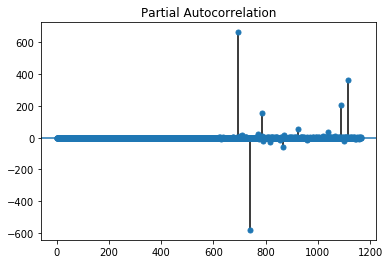

In [237]:
df["Close First Difference"].plot()
result = plot_pacf(df["Close First Difference"].dropna())

Interpretation

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

# Using the ARIMA model

In [238]:
from statsmodels.tsa.arima_model import ARIMA

In [239]:
df.index

Index(['12/31/2013', '1/2/2014', '1/3/2014', '1/6/2014', '1/7/2014',
       '1/8/2014', '1/9/2014', '1/10/2014', '1/13/2014', '1/14/2014',
       ...
       '8/6/2018', '8/7/2018', '8/8/2018', '8/9/2018', '8/10/2018',
       '8/13/2018', '8/14/2018', '8/15/2018', '8/16/2018', '8/17/2018'],
      dtype='object', name='Date', length=1167)

In [240]:
rng = pd.date_range('2013-12-31', periods=1167, freq='B')
rng

DatetimeIndex(['2013-12-31', '2014-01-01', '2014-01-02', '2014-01-03',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-13',
               ...
               '2018-06-07', '2018-06-08', '2018-06-11', '2018-06-12',
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-18',
               '2018-06-19', '2018-06-20'],
              dtype='datetime64[ns]', length=1167, freq='B')

In [241]:
model = ARIMA(df['Close'],order=(0,1,0),freq='B',dates=rng)

In [242]:
results = model.fit()

In [243]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1166
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2333.597
Method:                           css   S.D. of innovations              1.790
Date:                Thu, 23 Aug 2018   AIC                           4671.194
Time:                        10:41:23   BIC                           4681.317
Sample:                    01-01-2014   HQIC                          4675.013
                         - 06-20-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1179      0.052      2.248      0.025       0.015       0.221


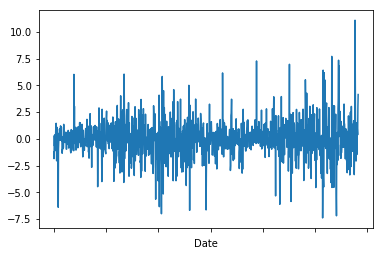

In [244]:
results.resid.plot()

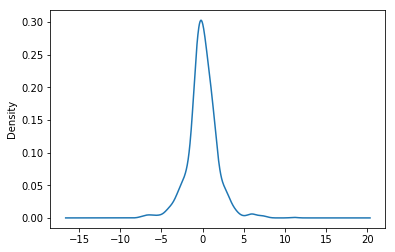

In [245]:
results.resid.plot(kind='kde')

In [366]:
df['forecast'] = results.predict(start = 1, end= 100, dynamic= True)  
df['forecast']


Date
12/31/2013   NaN
1/2/2014     NaN
1/3/2014     NaN
1/6/2014     NaN
1/7/2014     NaN
1/8/2014     NaN
1/9/2014     NaN
1/10/2014    NaN
1/13/2014    NaN
1/14/2014    NaN
1/15/2014    NaN
1/16/2014    NaN
1/17/2014    NaN
1/21/2014    NaN
1/22/2014    NaN
1/23/2014    NaN
1/24/2014    NaN
1/27/2014    NaN
1/28/2014    NaN
1/29/2014    NaN
1/30/2014    NaN
1/31/2014    NaN
2/3/2014     NaN
2/4/2014     NaN
2/5/2014     NaN
2/6/2014     NaN
2/7/2014     NaN
2/10/2014    NaN
2/11/2014    NaN
2/12/2014    NaN
              ..
7/9/2018     NaN
7/10/2018    NaN
7/11/2018    NaN
7/12/2018    NaN
7/13/2018    NaN
7/16/2018    NaN
7/17/2018    NaN
7/18/2018    NaN
7/19/2018    NaN
7/20/2018    NaN
7/23/2018    NaN
7/24/2018    NaN
7/25/2018    NaN
7/26/2018    NaN
7/27/2018    NaN
7/30/2018    NaN
7/31/2018    NaN
8/1/2018     NaN
8/2/2018     NaN
8/3/2018     NaN
8/6/2018     NaN
8/7/2018     NaN
8/8/2018     NaN
8/9/2018     NaN
8/10/2018    NaN
8/13/2018    NaN
8/14/2018    NaN
8/15/2018

In [334]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0), seasonal_order=(1,1,1,5),freq='B',dates=rng)
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Close   No. Observations:                 1167
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 5)   Log Likelihood               -2339.342
Date:                           Thu, 23 Aug 2018   AIC                           4684.684
Time:                                   11:38:44   BIC                           4699.855
Sample:                               12-31-2013   HQIC                          4690.408
                                    - 06-20-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.0016      0.027      0.060      0.952      -0.052       0.055
ma.S.L5       -0.9999      0.494     -2.026

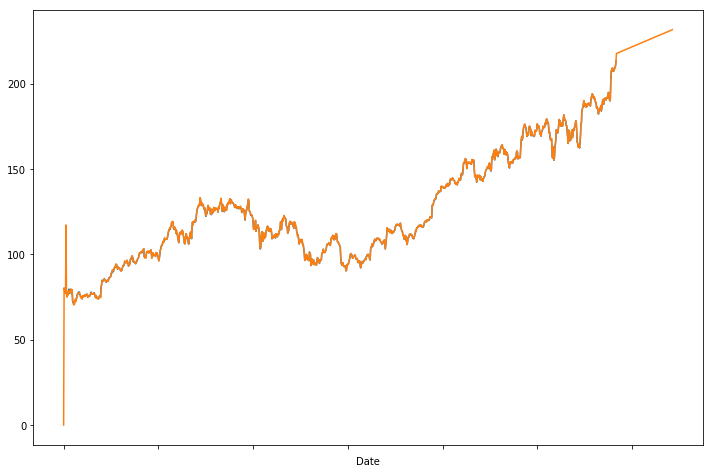

In [339]:
df['Close'].shift().plot(figsize=(12,8))
plt.plot(results.forecasts[0])
plt.show()

# Forecasting

In [287]:
future_dates = pd.date_range(df.index[-1],periods=120,freq='B')

In [288]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [289]:
future_df = pd.concat([df,future_dates_df])

In [293]:
future_df.index = pd.to_datetime(future_df.index) 

In [317]:
future_df.Close

2013-12-31    80.145714
2014-01-02    79.018570
2014-01-03    77.282860
2014-01-06    77.704285
2014-01-07    77.148575
2014-01-08    77.637146
2014-01-09    76.645714
2014-01-10    76.134285
2014-01-13    76.532860
2014-01-14    78.055717
2014-01-15    79.622856
2014-01-16    79.178574
2014-01-17    77.238571
2014-01-21    78.438568
2014-01-22    78.787140
2014-01-23    79.454285
2014-01-24    78.010002
2014-01-27    78.642860
2014-01-28    72.357140
2014-01-29    71.535713
2014-01-30    71.397141
2014-01-31    71.514282
2014-02-03    71.647141
2014-02-04    72.684288
2014-02-05    73.227142
2014-02-06    73.215714
2014-02-07    74.239998
2014-02-10    75.570000
2014-02-11    76.565712
2014-02-12    76.559998
                ...    
2018-12-21          NaN
2018-12-24          NaN
2018-12-25          NaN
2018-12-26          NaN
2018-12-27          NaN
2018-12-28          NaN
2018-12-31          NaN
2019-01-01          NaN
2019-01-02          NaN
2019-01-03          NaN
2019-01-04      

In [336]:
model = sm.tsa.statespace.SARIMAX(future_df['Close'],order=(0,1,0), seasonal_order=(1,1,1,5),freq='B',dates=rng)
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Close   No. Observations:                 1286
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 5)   Log Likelihood               -2339.342
Date:                           Thu, 23 Aug 2018   AIC                           4684.684
Time:                                   11:38:56   BIC                           4700.148
Sample:                               12-31-2013   HQIC                          4690.491
                                    - 06-20-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.0016      0.027      0.059      0.953      -0.052       0.055
ma.S.L5       -0.9999      0.656     -1.524

In [337]:
future_df.head()

,Open,High,Low,Close,Adj Close,Volume,Close First Difference,forecast
2013-12-31,79.167145,80.182854,79.142860,80.145714,68.448830,55771100,NaN,NaN
2014-01-02,79.382858,79.575714,78.860001,79.018570,67.486176,58671200,-1.127144,NaN
2014-01-03,78.980003,79.099998,77.204285,77.282860,66.003777,98116900,-1.735710,NaN
2014-01-06,76.778572,78.114288,76.228569,77.704285,66.363701,103152700,0.421425,NaN
2014-01-07,77.760002,77.994286,76.845711,77.148575,65.889114,79302300,-0.555710,NaN
2014-01-08,76.972855,77.937141,76.955711,77.637146,66.306381,64632400,0.488571,NaN
2014-01-09,78.114288,78.122856,76.478569,76.645714,65.459641,69787200,-0.991432,NaN
2014-01-10,77.118568,77.257141,75.872856,76.134285,65.022835,76244000,-0.511429,NaN
2014-01-13,75.701431,77.500000,75.697144,76.532860,65.363243,94623200,0.398575,NaN
2014-01-14,76.888573,78.104286,76.808571,78.055717,66.663857,83140400,1.522857,NaN


In [368]:
future_df ['forecast1'] = results.forecasts[0].T

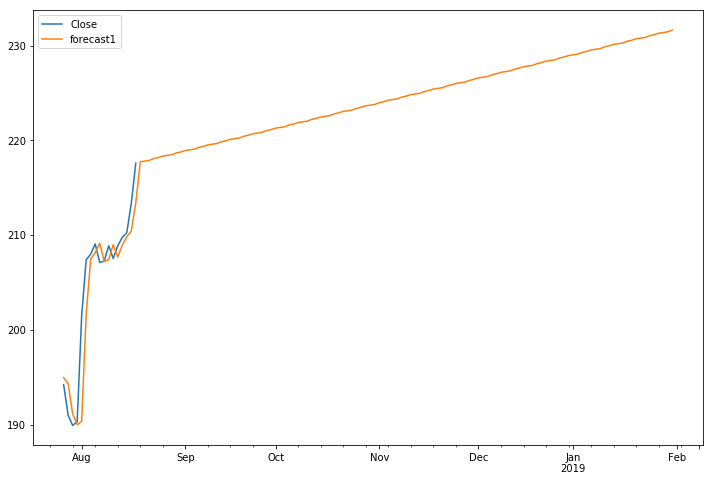

In [369]:
future_df[['Close', 'forecast1']][1150:].plot(figsize=(12, 8))

Trend is going Up but not very accurate

In [379]:
future_df['forecast1'][1170]

218.06873486067593